# Anomaly Detection in Stock Prices 

In this notebook, we perform anomaly detection on **Apple's stock price (AAPL)** using Python. We will:

1. Fetch stock data using `yfinance`
2. Preprocess and visualize the data
3. Use statistical anomaly detection (Z-score method)
4. Highlight anomalies on the stock price chart


In [9]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import sys
!{sys.executable} -m pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [4]:
# Configure plot size
plt.rcParams['figure.figsize'] = (14, 7)
plt.show()

### Step 1: Fetch Historical Stock Data

In [5]:
# Define stock ticker and download data from Yahoo Finance
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2024-04-01', end='2025-04-01')

# Display first few rows
stock_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-04-01,169.230927,170.445194,168.683508,170.385479,46240500
2024-04-02,168.046494,168.544144,167.439360,168.285371,49329500
2024-04-03,168.852707,169.877865,167.787743,167.996748,47691700
2024-04-04,168.026611,171.112033,168.026611,169.489689,53704400
2024-04-05,168.783035,169.589226,168.155991,168.792983,42055200


### Step 2: Data Preprocessing

In [7]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [9]:
stock_data[['Low']]

Price,Low
Ticker,AAPL
Date,
2024-04-01,168.683508
2024-04-02,167.439360
2024-04-03,167.787743
2024-04-04,168.026611
2024-04-05,168.155991
...,...
2025-03-25,220.080002
2025-03-26,220.470001


In [6]:
# Check and fill missing values
print("Missing values before:", stock_data.isnull().sum())
stock_data.fillna(method='ffill', inplace=True)
print("Missing values after:", stock_data.isnull().sum())


Missing values before: Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Missing values after: Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


C:\Users\victor\AppData\Local\Temp\ipykernel_7996\1699865331.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


### Step 3: Visualize the Stock Closing Prices

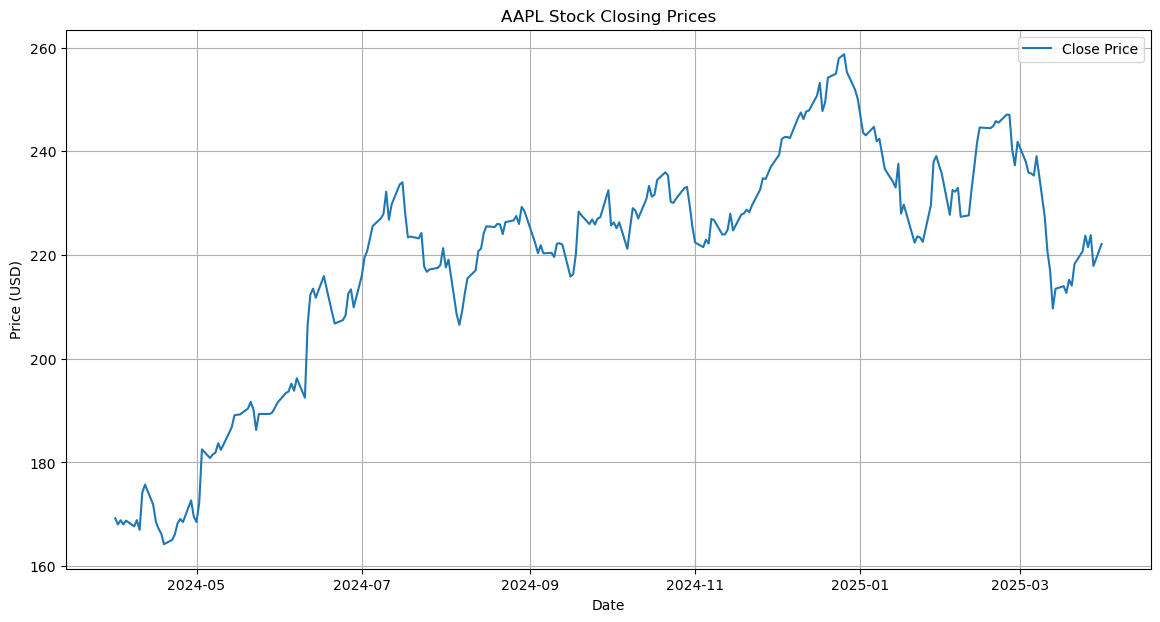

In [10]:
# Plot the stock closing price over time
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


### Step 4: Anomaly Detection Using Z-score

In [11]:
# Calculate rolling statistics
rolling_mean = stock_data['Close'].rolling(window=20).mean()
rolling_std = stock_data['Close'].rolling(window=20).std()

# Compute Z-score
stock_data['Z-Score'] = (stock_data['Close'] - rolling_mean) / rolling_std

# Define a threshold and identify anomalies
threshold = 3
stock_data['Anomaly'] = stock_data['Z-Score'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')

# Display anomalies
stock_data[stock_data['Anomaly'] == 'Yes']


Price,Close,High,Low,Open,Volume,Z-Score,Anomaly
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2024-05-03,182.518173,186.121155,181.801556,185.772794,163224100,3.019513,Yes
2024-06-11,206.456100,206.466077,192.981400,193.001322,172373300,3.401991,Yes
2024-06-12,212.356308,219.462415,206.206962,206.675389,198134300,3.133908,Yes


In [12]:
# We use 3 because:

# It’s a good balance between "not too many false alarms" and "not missing real anomalies."

# It’s based on normal distribution rules (what statisticians call the "68-95-99.7 rule").

### Step 5: Visualize Detected Anomalies

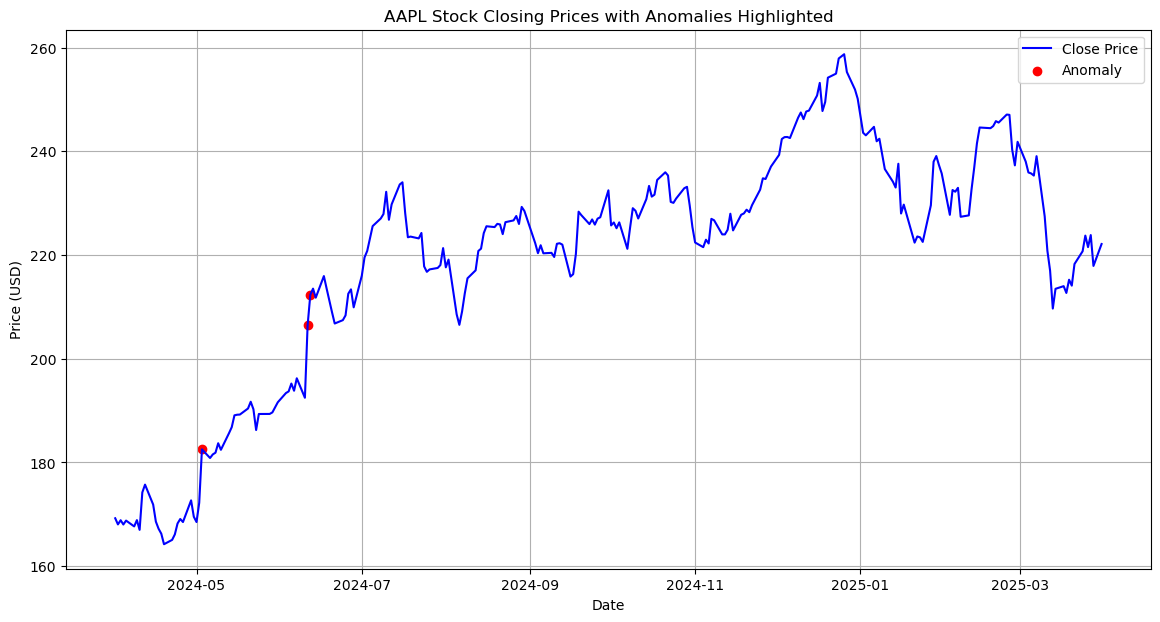

In [13]:
# Plot the close prices with anomalies highlighted
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')

# Mark anomalies
anomalies = stock_data[stock_data['Anomaly'] == 'Yes']
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly', marker='o')

plt.title(f'{ticker} Stock Closing Prices with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Summary

In this notebook, we:
- Collected real-time stock data
- Cleaned and visualized the data
- Used the Z-score method to identify abnormal price movements
- Highlighted those anomalies on the time series plot





In [ ]:
git add stock_price_anomaly_detection.ipynb